In [53]:
import pandas as pd
import numpy as np

In [54]:
data = pd.read_excel(r'Student Practise.xlsx')
data

,Age,Attrition,DistanceFromHome,MaritalStatus,OverTime,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel,Department
0,41,Yes,1,Single,Yes,8,0,1,6,4,0,5,Travel_Rarely,Sales
1,49,No,8,Married,No,10,3,3,10,7,1,7,Travel_Frequently,Research & Development
2,37,Yes,2,Single,Yes,7,3,3,0,0,0,0,Travel_Rarely,Research & Development
3,33,No,3,Married,Yes,8,3,3,8,7,3,0,Travel_Frequently,Research & Development
4,27,No,2,Married,No,6,3,3,2,2,2,2,Travel_Rarely,Research & Development
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,23,Married,No,17,3,3,5,2,0,3,Travel_Frequently,Research & Development
1466,39,No,6,Married,No,9,5,3,7,7,1,7,Travel_Rarely,Research & Development
1467,27,No,4,Married,Yes,6,0,3,6,2,0,3,Travel_Rarely,Research & Development
1468,49,No,2,Married,No,17,3,2,9,6,0,8,Travel_Frequently,Sales


In [55]:
data.describe()

,Age,DistanceFromHome,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,8.106864,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,7.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,14.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,29.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [56]:
data_num = data[data.select_dtypes(include=[np.number]).columns.tolist()]
data_num.head(3)

,Age,DistanceFromHome,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,8,0,1,6,4,0,5
1,49,8,10,3,3,10,7,1,7
2,37,2,7,3,3,0,0,0,0


In [57]:
data_cat = data[data.select_dtypes(include=['object']).columns.tolist()]
data_cat.head(3)

,Attrition,MaritalStatus,OverTime,BusinessTravel,Department
0,Yes,Single,Yes,Travel_Rarely,Sales
1,No,Married,No,Travel_Frequently,Research & Development
2,Yes,Single,Yes,Travel_Rarely,Research & Development


In [58]:
from sklearn.preprocessing import LabelEncoder
data_dumm=data_cat.apply(LabelEncoder().fit_transform)
data_dumm.head(3)

,Attrition,MaritalStatus,OverTime,BusinessTravel,Department
0,1,2,1,2,2
1,0,1,0,1,1
2,1,2,1,2,1


In [59]:
data_combined = pd.concat([data_num, data_dumm],axis=1)
data_combined

,Age,DistanceFromHome,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,MaritalStatus,OverTime,BusinessTravel,Department
0,41,1,8,0,1,6,4,0,5,1,2,1,2,2
1,49,8,10,3,3,10,7,1,7,0,1,0,1,1
2,37,2,7,3,3,0,0,0,0,1,2,1,2,1
3,33,3,8,3,3,8,7,3,0,0,1,1,1,1
4,27,2,6,3,3,2,2,2,2,0,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,23,17,3,3,5,2,0,3,0,1,0,1,1
1466,39,6,9,5,3,7,7,1,7,0,1,0,2,1
1467,27,4,6,0,3,6,2,0,3,0,1,1,2,1
1468,49,2,17,3,2,9,6,0,8,0,1,0,1,2


In [60]:
#Dividing data into train and test dataset
from sklearn.model_selection import train_test_split
#from random import seed

#seed(20)
x = data_combined.drop(['Attrition'],axis=1)
y = data_combined[['Attrition']]

# Train test split

X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=0.3,random_state=225)

In [61]:
from sklearn import tree

dt = tree.DecisionTreeClassifier()  # by default it use Gini index for split
#Train the model using the training sets
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [62]:
train=pd.concat([y_train,X_train],axis=1)
train.head()

,Attrition,Age,DistanceFromHome,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,MaritalStatus,OverTime,BusinessTravel,Department
1361,0,26,6,8,3,3,7,7,7,7,1,0,1,1
337,0,29,9,4,2,3,3,2,2,2,2,0,2,1
941,0,30,6,10,6,3,9,2,6,7,1,0,2,1
554,0,27,7,9,2,1,7,6,0,7,2,0,2,1
260,0,32,7,5,3,1,5,1,0,3,1,0,1,1


In [63]:
features = list(train.columns[1:])
features

['Age',
 'DistanceFromHome',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'MaritalStatus',
 'OverTime',
 'BusinessTravel',
 'Department']

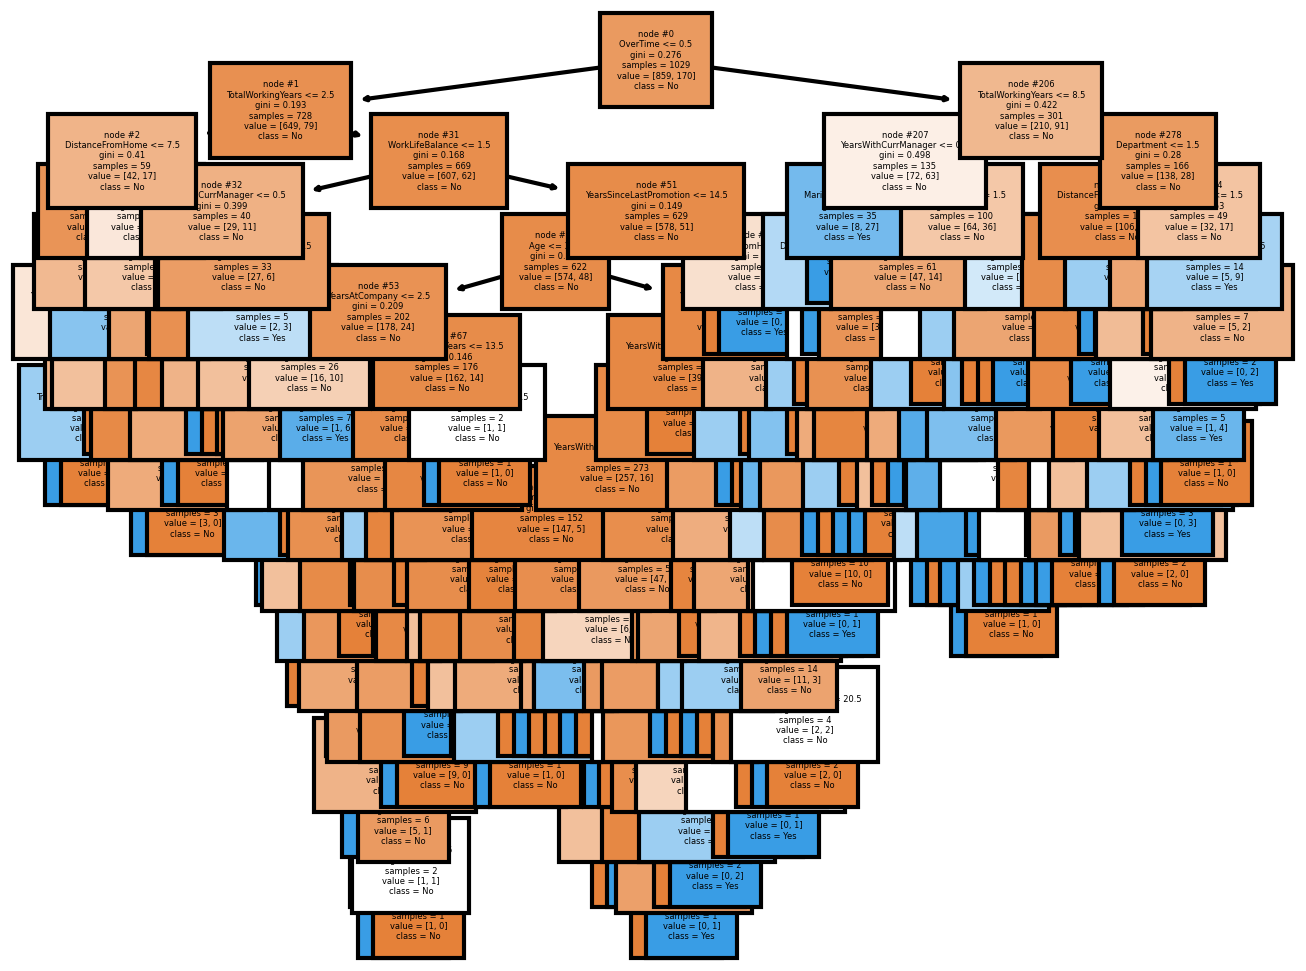

In [64]:
from sklearn import tree
import matplotlib.pyplot as plt

Attrition=['No', 'Yes']  # array
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(dt,  # Model 
               feature_names = features,  # column name
               class_names=Attrition, # Yes , No
               filled = True, # colour
              node_ids=True, # node number
              fontsize=2); # 
#fig.savefig('imagename.png')

In [65]:
train['Predicted']=dt.predict(X_train)  # MODEL = dt
train.head()

,Attrition,Age,DistanceFromHome,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,MaritalStatus,OverTime,BusinessTravel,Department,Predicted
1361,0,26,6,8,3,3,7,7,7,7,1,0,1,1,0
337,0,29,9,4,2,3,3,2,2,2,2,0,2,1,0
941,0,30,6,10,6,3,9,2,6,7,1,0,2,1,0
554,0,27,7,9,2,1,7,6,0,7,2,0,2,1,0
260,0,32,7,5,3,1,5,1,0,3,1,0,1,1,0


In [66]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['Attrition'])
print(matrix)

[[859   0]
 [  0 170]]


In [67]:
from sklearn.metrics import classification_report
print(classification_report(train['Attrition'], train['Predicted']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       859
           1       1.00      1.00      1.00       170

    accuracy                           1.00      1029
   macro avg       1.00      1.00      1.00      1029
weighted avg       1.00      1.00      1.00      1029



#### Our model is overfitted. So we will go for prunning using grid search. 

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = { 'min_samples_split': [100, 200,270], ## Parent 
           'min_samples_leaf': [50,70,80], ## Child or Leave 
           'max_depth':[3,4,6]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42),
                              params, 
                              verbose=1, 
                              cv=10)
grid_search_cv.fit(X_train, y_train) 

Fitting 10 folds for each of 27 candidates, totalling 270 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 4, 6],
                         'min_samples_leaf': [50, 70, 80],
                         'min_samples_split': [100, 200, 270]},
             verbose=1)

In [69]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=50, min_samples_split=100,
                       random_state=42)

In [71]:
#Import Tree Classifier model
from sklearn import tree

dt = tree.DecisionTreeClassifier(criterion='gini',  #splitter
                                 min_samples_leaf=50, ## child
                                 min_samples_split=100, #parent 
                                 max_depth=3)  #branches
#Train the model using the training sets
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=50, min_samples_split=100)

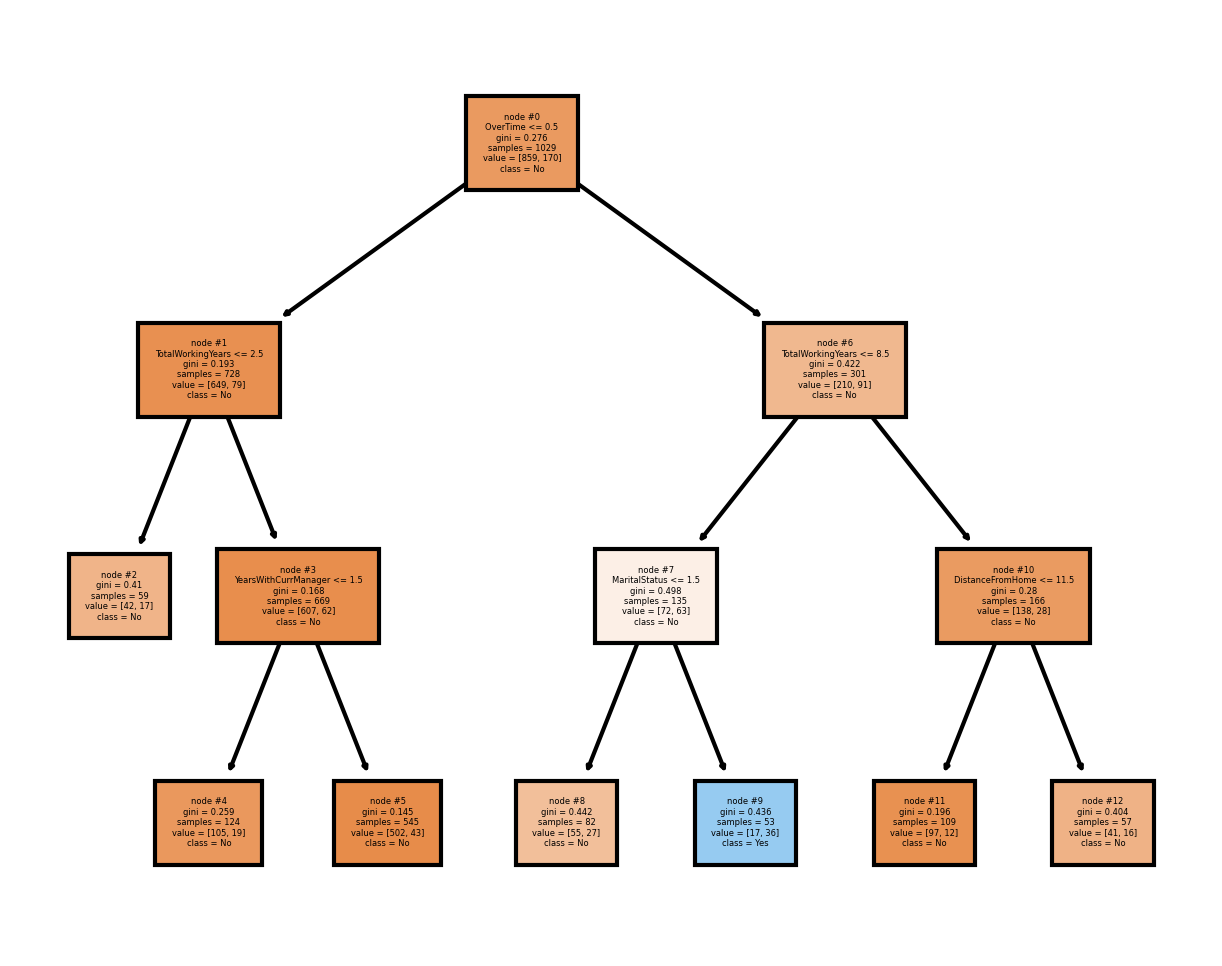

In [72]:
from sklearn import tree
import matplotlib.pyplot as plt

Attrition=['No', 'Yes']  # array
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(dt,  # Model 
               feature_names = features,  # column name
               class_names=Attrition, # Yes , No
               filled = True, # colour
              node_ids=True, # node number
              fontsize=2); # 
#fig.savefig('imagename.png')

In [73]:
train['Predicted']=dt.predict(X_train)  # MODEL = dt
train.head()

,Attrition,Age,DistanceFromHome,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,MaritalStatus,OverTime,BusinessTravel,Department,Predicted
1361,0,26,6,8,3,3,7,7,7,7,1,0,1,1,0
337,0,29,9,4,2,3,3,2,2,2,2,0,2,1,0
941,0,30,6,10,6,3,9,2,6,7,1,0,2,1,0
554,0,27,7,9,2,1,7,6,0,7,2,0,2,1,0
260,0,32,7,5,3,1,5,1,0,3,1,0,1,1,0


In [74]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['Attrition'])
print(matrix)

[[842 134]
 [ 17  36]]


In [75]:
from sklearn.metrics import classification_report
print(classification_report(train['Attrition'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       859
           1       0.68      0.21      0.32       170

    accuracy                           0.85      1029
   macro avg       0.77      0.60      0.62      1029
weighted avg       0.83      0.85      0.82      1029



#### Accuracy of our model is 85% after prunning

In [76]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,Age,DistanceFromHome,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,MaritalStatus,OverTime,BusinessTravel,Department,Attrition
868,28,19,6,2,3,6,5,3,3,1,0,2,1,0
1010,55,1,31,4,4,7,7,0,0,0,0,2,1,0
733,26,2,8,2,3,8,7,1,3,1,0,2,1,0
159,34,2,6,3,3,4,3,1,2,1,0,1,2,0
1036,31,2,7,2,1,2,2,2,2,1,1,1,1,1


In [77]:
test['Predicted']=dt.predict(X_test)
test.head()

,Age,DistanceFromHome,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,MaritalStatus,OverTime,BusinessTravel,Department,Attrition,Predicted
868,28,19,6,2,3,6,5,3,3,1,0,2,1,0,0
1010,55,1,31,4,4,7,7,0,0,0,0,2,1,0,0
733,26,2,8,2,3,8,7,1,3,1,0,2,1,0,0
159,34,2,6,3,3,4,3,1,2,1,0,1,2,0,0
1036,31,2,7,2,1,2,2,2,2,1,1,1,1,1,0


In [78]:
from sklearn.metrics import classification_report
print(classification_report(test['Attrition'], test['Predicted']))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       374
           1       0.55      0.09      0.15        67

    accuracy                           0.85       441
   macro avg       0.70      0.54      0.54       441
weighted avg       0.81      0.85      0.80       441

